# Real World Evidence (#67675) - Project

## Accidental death by fatal drug overdose is a rising trend in the United States. What can we do to help?

The data set used in this project was obtained from https://www.kaggle.com/apryor6/us-opiate-prescriptions

## Data

* `overdoses.csv` - Statistics on opioid related drug overdoses in 2014
* `prescriber-info.csv` - Prescription drug information by doctor in the U.S. 2014
* `opioids.csv` - List of drugs classified as opiates

## Imports

In [63]:
from matplotlib import style as style
import matplotlib.pyplot as plt
style.use('ggplot')
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Descriptive Statistics

### State Overdose Statistics

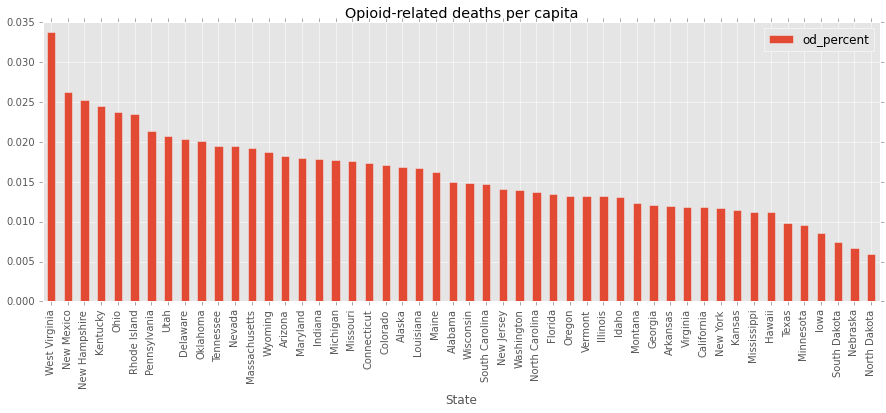

In [71]:
state_ods = pd.read_csv('data/overdoses.csv', thousands=',')
state_ods['od_percent'] = 100 * (state_ods.Deaths / state_ods.Population)
state_ods = state_ods.sort('od_percent', ascending=False)
state_ods.plot(kind='bar', x='State', y='od_percent', title="Opioid-related deaths per capita", figsize=(15,5))
show()

Focusing on the top-10 states, with respect to the percentage of opioid-related overdoses, we see a cluster of east-coast states:

![caption](img/highest_percentage_states.png)

### Prescriber Statistics

In [119]:
prescriber_info = pd.read_csv('data/prescriber-info.csv', thousands=',')
opiad_prescriber_idxs = prescriber_info.apply(lambda r: r['Opioid.Prescriber'] == 1, axis=1)
opiad_prescriber_info = prescriber_info[opiad_prescriber_idxs]
opiad_prescriber_state_grp = opiad_prescriber_info.groupby(['State'])

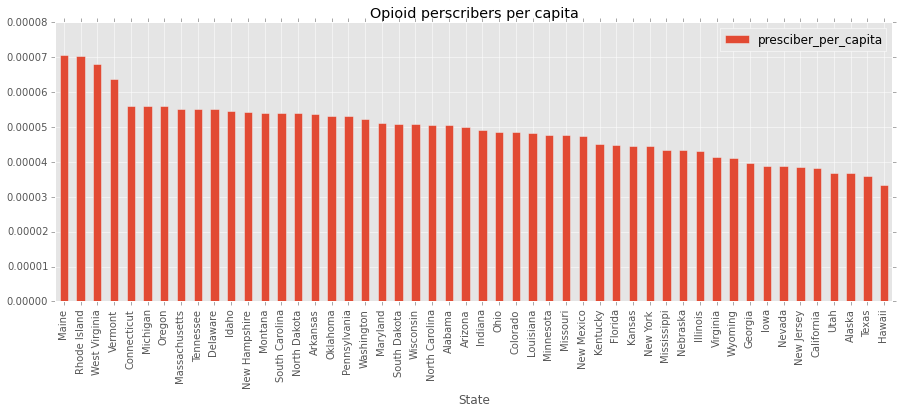

In [149]:
states = [sn for sn, g in opiad_prescriber_state_grp]
opiad_prescribers_state_count = pd.DataFrame({'Abbrev': states, 'num_of_prescribers': opiad_prescriber_state_grp.size()})
opiad_prescribers_state_count.head()
join_ods_prescribers = pd.merge(state_ods, opiad_prescribers_state_count, how='inner', on=['Abbrev'])
join_ods_prescribers['presciber_per_capita'] = join_ods_prescribers['num_of_prescribers'] / join_ods_prescribers['Population'] 
join_ods_prescribers = join_ods_prescribers.sort('presciber_per_capita', ascending=False)
join_ods_prescribers.plot(kind='bar', x='State', y='presciber_per_capita', title="Opioid perscribers per capita", figsize=(15,5))
